In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV

# Подготавливаем датасет 

In [89]:
data = pd.read_csv(filepath_or_buffer = "./pokemon.csv")
# надо убрать дубликаты
# убираем пустые значения

for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())

In [90]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [91]:
df.describe() # посчитаем немного статистики для наших данных

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.054996e+06,1.163892,68.958801,55.155761,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.602558e+05,1.080326,26.576015,20.261623,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,6.000000e+05,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,1.000000e+06,0.600000,50.000000,50.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+06,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.059860e+06,1.500000,80.000000,50.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.640000e+06,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [92]:
#посмотрим, какие типы есть
data.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [93]:
#заменям флоат на инт
for label,content in data.items():
    if pd.api.types.is_float_dtype(content):
        data[label] = data[label].astype('int')

In [94]:
data.dtypes # ура, заменилось!!

abilities            object
against_bug           int32
against_dark          int32
against_dragon        int32
against_electric      int32
against_fairy         int32
against_fight         int32
against_fire          int32
against_flying        int32
against_ghost         int32
against_grass         int32
against_ground        int32
against_ice           int32
against_normal        int32
against_poison        int32
against_psychic       int32
against_rock          int32
against_steel         int32
against_water         int32
attack                int64
base_egg_steps        int64
base_happiness        int64
base_total            int64
capture_rate         object
classfication        object
defense               int64
experience_growth     int64
height_m              int32
hp                    int64
japanese_name        object
name                 object
percentage_male       int32
pokedex_number        int64
sp_attack             int64
sp_defense            int64
speed               

In [95]:
# теперь нужно заменить обджект на категориальные значения
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = data[label].astype('category')
        
for label,content in data.items():
    if pd.api.types.is_categorical_dtype(content):
        data[label] = pd.Categorical(content).codes + 1

In [96]:
data.dtypes #ура!

abilities            int16
against_bug          int32
against_dark         int32
against_dragon       int32
against_electric     int32
against_fairy        int32
against_fight        int32
against_fire         int32
against_flying       int32
against_ghost        int32
against_grass        int32
against_ground       int32
against_ice          int32
against_normal       int32
against_poison       int32
against_psychic      int32
against_rock         int32
against_steel        int32
against_water        int32
attack               int64
base_egg_steps       int64
base_happiness       int64
base_total           int64
capture_rate          int8
classfication        int16
defense              int64
experience_growth    int64
height_m             int32
hp                   int64
japanese_name        int16
name                 int16
percentage_male      int32
pokedex_number       int64
sp_attack            int64
sp_defense           int64
speed                int64
type1                 int8
t

# Делаем классификацию 

In [97]:
X = data.drop('is_legendary',axis=1)
y = data['is_legendary']

In [98]:
# делаем модель
model_a = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_a.fit(X_train,y_train)
model_a.score(X_test,y_test)
# ну в целом неплохо

C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9813664596273292

In [99]:
# проверяем кросс-валидацией
y_preds = model_a.predict_proba(X_test)
cvm = cross_val_score(model_a,X,y,cv=10)
np.mean(cvm)

0.97875

In [100]:
# насколько хороша наша модель? 
y_preds = model_a.predict(X_test)

precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
accuracy = accuracy_score(y_test,y_preds)
accuracy,recall,precision

(0.9813664596273292, 0.85, 1.0)

In [101]:
# записываем предсказание
Pokemon = pd.DataFrame()
y_preds = model_a.predict(X)
Pokemon['Default values'] = y
Pokemon['Predictions'] = y_preds

# Отвечаем на вопросы

# 1) Вероятность какого вида покемонов быть легендарным самая высокая?

In [108]:
data1 = pd.read_csv(filepath_or_buffer = "./pokemon.csv")
# надо убрать дубликаты
# убираем пустые значения

for label,content in data1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data1[label] = content.fillna(content.median())

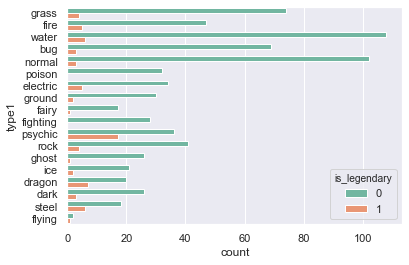

In [119]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type1", hue="is_legendary", data=data1, palette="Set2")

По этому графику видно абсолютное значение числа легендарных и нелегендарных покемонов в каждом виде. Но для того, чтобы узнать вероятность, нужно посмотреть на процентное отношение.

In [251]:
data12 = data1[["type1", "is_legendary"]]
df = pd.DataFrame(data12.groupby('type1')['is_legendary'].sum())
df["all"] = data12.type1.value_counts()
df['percent'] = df['is_legendary'] / df['all']
df

,is_legendary,all,percent
type1,,,
bug,3,72,0.041667
dark,3,29,0.103448
dragon,7,27,0.259259
electric,5,39,0.128205
fairy,1,18,0.055556
fighting,0,28,0.000000
fire,5,52,0.096154
flying,1,3,0.333333
ghost,1,27,0.037037


Видно, что максимальные значения - 0.33 в летающих, 0.32 в психах, 0.26 в драконах и 0.25 в стальных. При этом летающих всего 3, так как их меньше 5 экземпляров - нельзя сделать определенных выводов --> не считаем их.

Значит большая вероятность быть легендарным у психов! 

# 2) Как кореллирует рост и вес покемона с его базовыми характеристиками?

Базовые характеристики, исходя из описания датасета: baseeggsteps, base_happiness, hp, attack, defense, sp_attack, sp_defense, speed

In [256]:
data0 = data1[['height_m', 'weight_kg', 'base_egg_steps', 'base_happiness', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
data0.head()

,height_m,weight_kg,base_egg_steps,base_happiness,hp,attack,defense,sp_attack,sp_defense,speed
0,0.7,6.9,5120,70,45,49,49,65,65,45
1,1.0,13.0,5120,70,60,62,63,80,80,60
2,2.0,100.0,5120,70,80,100,123,122,120,80
3,0.6,8.5,5120,70,39,52,43,60,50,65
4,1.1,19.0,5120,70,58,64,58,80,65,80


1) Вначале рассмотрим рост

<Figure size 432x432 with 0 Axes>

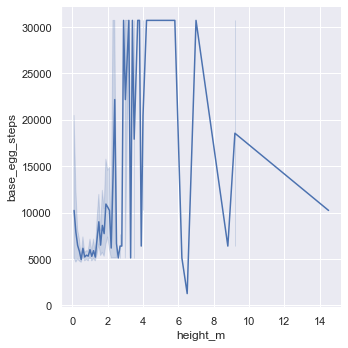

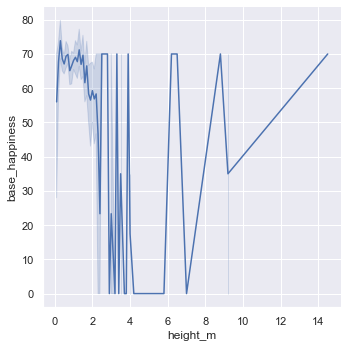

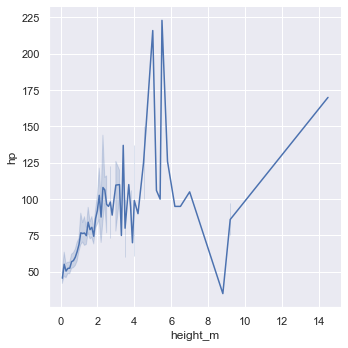

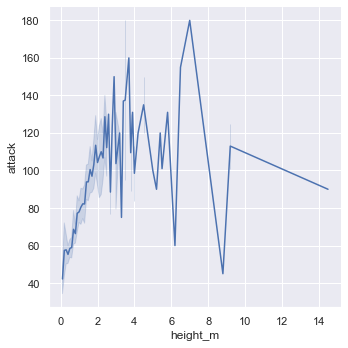

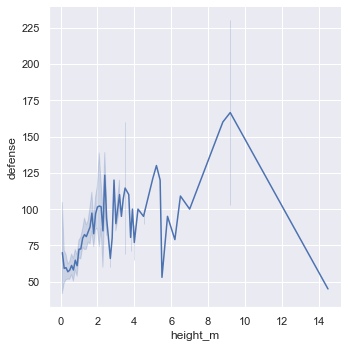

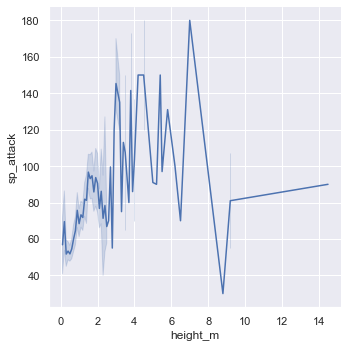

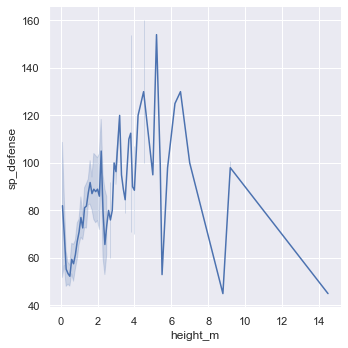

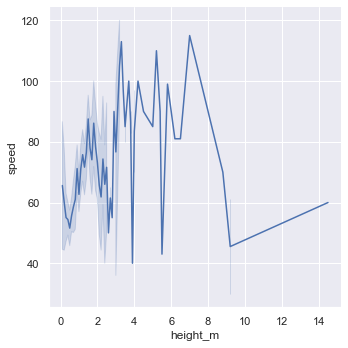

In [266]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    sns.relplot(y="base_egg_steps", x="height_m", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="base_happiness", x="height_m", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="hp", x="height_m", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="attack", x="height_m", kind="line", data=data0);
    
with sns.axes_style("darkgrid"):
    sns.relplot(y="defense", x="height_m", kind="line", data=data0);
    
with sns.axes_style("darkgrid"):
    sns.relplot(y="sp_attack", x="height_m", kind="line", data=data0);
    
with sns.axes_style("darkgrid"):
    sns.relplot(y="sp_defense", x="height_m", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="speed", x="height_m", kind="line", data=data0);
    
f.tight_layout()

In [269]:
"""
От роста не зависит ни один из базовых параметров. 
\n Однако можно заметить, что если рост покемона до 6, то некоторые корреляции могут быть. 
\n Например:
\n 1) Чем выше покемон, тем больше у него хп
\n 2) Чем выше покемон, тем сильнее у него атака
\n 3) Чем выше покемон, тем сильнее у него защита
"""

'\nОт роста не зависит ни один из базовых параметров. \n\n Однако можно заметить, что если рост покемона до 6, то некоторые корреляции могут быть. \n\n Например:\n\n 1) Чем выше покемон, тем больше у него хп\n\n 2) Чем выше покемон, тем сильнее у него атака\n\n 3) Чем выше покемон, тем сильнее у него защита\n'

2) Теперь посмотрим на вес

<Figure size 432x432 with 0 Axes>

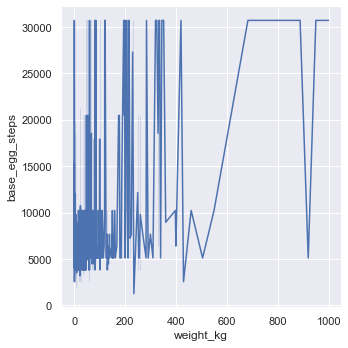

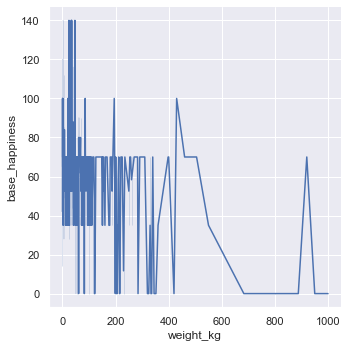

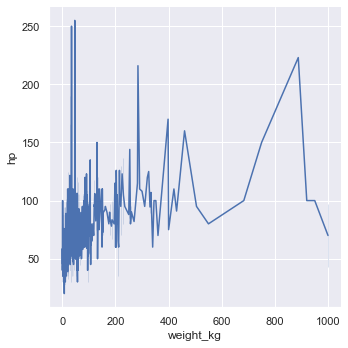

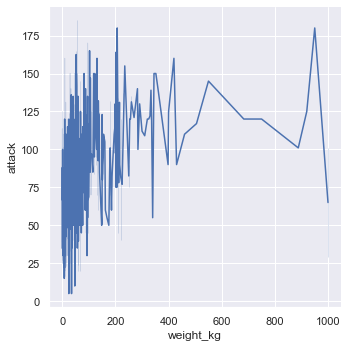

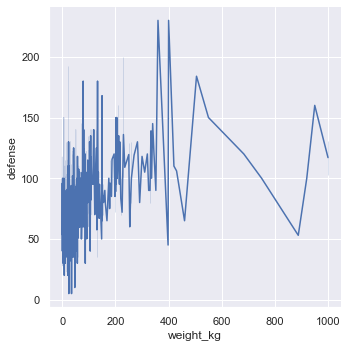

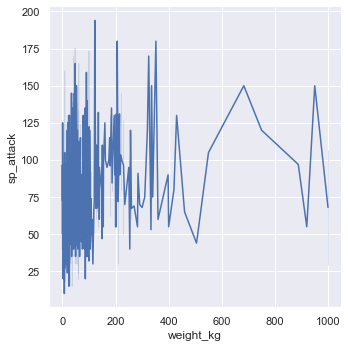

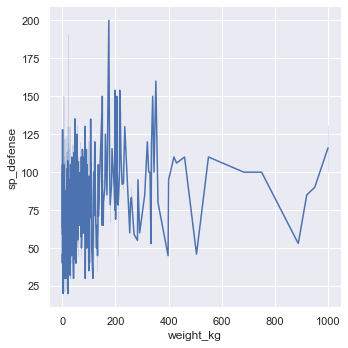

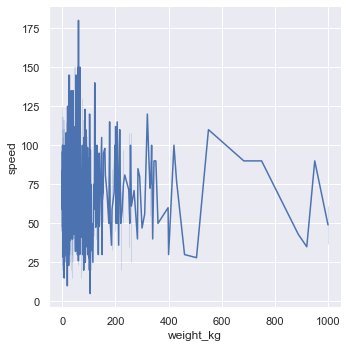

In [271]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    sns.relplot(y="base_egg_steps", x="weight_kg", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="base_happiness", x="weight_kg", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="hp", x="weight_kg", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="attack", x="weight_kg", kind="line", data=data0);
    
with sns.axes_style("darkgrid"):
    sns.relplot(y="defense", x="weight_kg", kind="line", data=data0);
    
with sns.axes_style("darkgrid"):
    sns.relplot(y="sp_attack", x="weight_kg", kind="line", data=data0);
    
with sns.axes_style("darkgrid"):
    sns.relplot(y="sp_defense", x="weight_kg", kind="line", data=data0);

with sns.axes_style("darkgrid"):
    sns.relplot(y="speed", x="weight_kg", kind="line", data=data0);
    
f.tight_layout()

In [272]:
"""
От веса не зависит ни один из базовых параметров. 
"""

'\nОт веса не зависит ни один из базовых параметров. \n'